**Libraries Required**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Dataset Import**

In [2]:
churn_set=pd.read_excel('/content/customer_churn_large_dataset.xlsx')

**Data Preprocessing**

Number of rows and column

In [3]:
churn_set.shape

(100000, 8)

Showing first five rows of the data set

In [4]:
churn_set.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0


Check wheather there is null value in dataset or not

In [5]:
churn_set.isnull().sum()

CustomerID                    0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**Data Analysis and Visualization**

Statistical properties of the dataset

In [6]:
churn_set.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Graph plot (To see which properties effect our label)

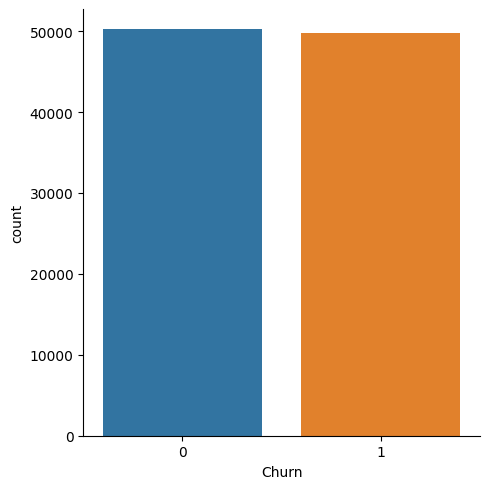

In [7]:
sns.catplot(x='Churn',data=churn_set,kind='count')

<Axes: xlabel='Churn', ylabel='Monthly_Bill'>

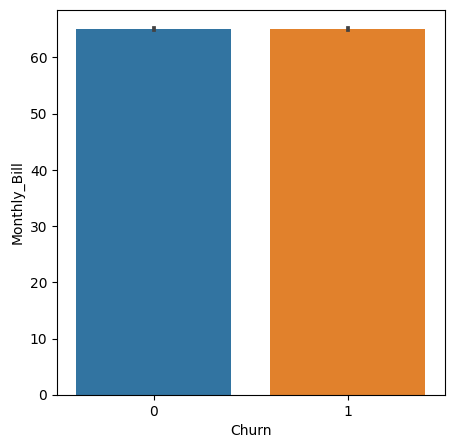

In [8]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Churn',y='Monthly_Bill',data=churn_set)

<Axes: xlabel='Churn', ylabel='Age'>

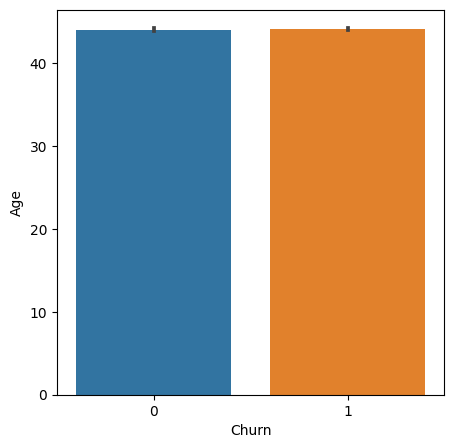

In [9]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Churn',y='Age',data=churn_set)

Correlation

<ipython-input-10-580e05bd6ddd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=churn_set.corr()


<Axes: >

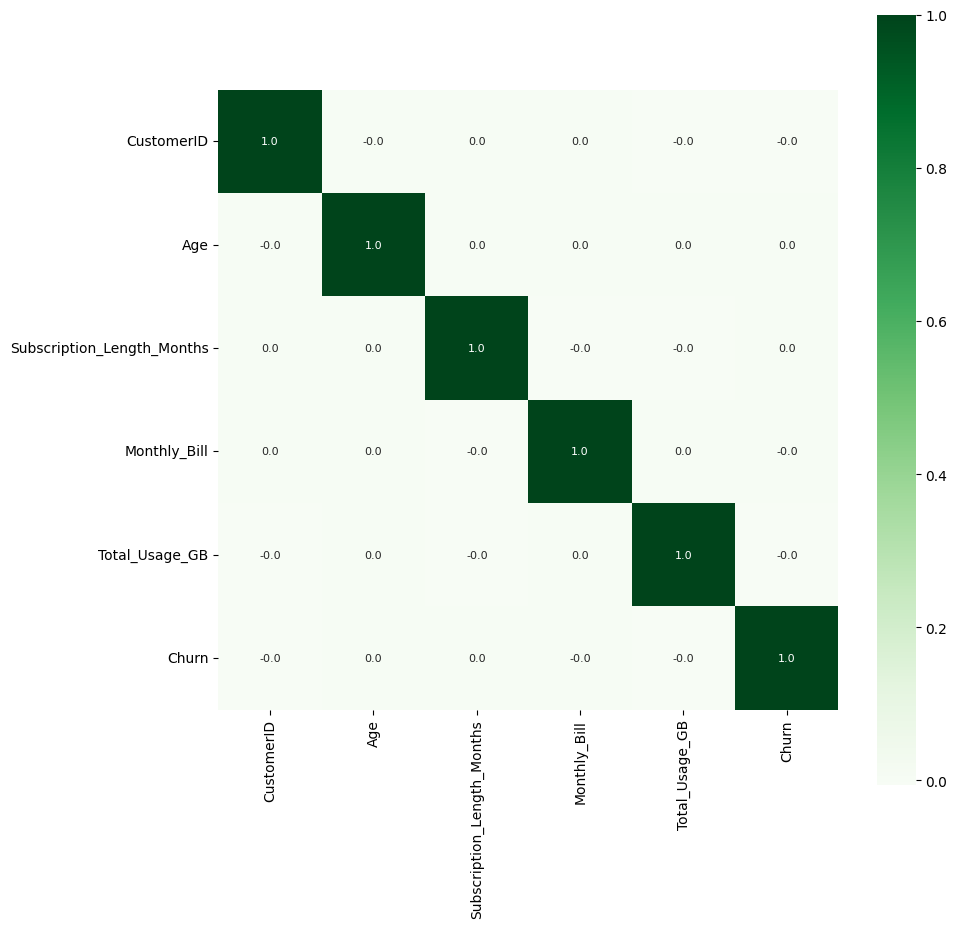

In [10]:
correlation=churn_set.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

**Data Preprocessing**

Removing Label for Churn Analysis

In [11]:
X = churn_set.drop('Churn',axis=1)

In [12]:
print(X)

       CustomerID  Age  Gender     Location  Subscription_Length_Months  \
0               1   63    Male  Los Angeles                          17   
1               2   62  Female     New York                           1   
2               3   24  Female  Los Angeles                           5   
3               4   36  Female        Miami                           3   
4               5   46  Female        Miami                          19   
...           ...  ...     ...          ...                         ...   
99995       99996   33    Male      Houston                          23   
99996       99997   62  Female     New York                          19   
99997       99998   64    Male      Chicago                          17   
99998       99999   51  Female     New York                          20   
99999      100000   27  Female  Los Angeles                          19   

       Monthly_Bill  Total_Usage_GB  
0             73.36             236  
1             48.76    

In [13]:
churn_set["Gender"].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

Label Binarization

In [14]:
Y = churn_set['Churn'].apply(lambda y_value: 1 if y_value>=1 else 0)

In [15]:
print(Y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


**Model Training and Testing**

Splitting data into training and testing

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [17]:
print(Y.shape,Y_train.shape,Y_test.shape)

(100000,) (80000,) (20000,)


**Model: Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: ignored

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Gender","Location"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X

array([[  0.  ,   1.  ,   0.  , ...,  17.  ,  73.36, 236.  ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,  48.76, 172.  ],
       [  1.  ,   0.  ,   0.  , ...,   5.  ,  85.47, 460.  ],
       ...,
       [  0.  ,   1.  ,   1.  , ...,  17.  ,  96.11, 251.  ],
       [  1.  ,   0.  ,   0.  , ...,  20.  ,  49.25, 434.  ],
       [  1.  ,   0.  ,   0.  , ...,  19.  ,  76.57, 173.  ]])

In [21]:
X.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,Male,Los Angeles,17,73.36,236
1,2,62,Female,New York,1,48.76,172
2,3,24,Female,Los Angeles,5,85.47,460
3,4,36,Female,Miami,3,97.94,297
4,5,46,Female,Miami,19,58.14,266


In [22]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,63.0,17.0,73.36,236.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,62.0,1.0,48.76,172.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,24.0,5.0,85.47,460.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,36.0,3.0,97.94,297.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,46.0,19.0,58.14,266.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,99996.0,33.0,23.0,55.13,226.0
99996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,99997.0,62.0,19.0,61.65,351.0
99997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,99998.0,64.0,17.0,96.11,251.0
99998,1.0,0.0,0.0,0.0,0.0,0.0,1.0,99999.0,51.0,20.0,49.25,434.0


In [24]:
dummies=pd.get_dummies(churn_set[["Gender","Location"]])
dummies

,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
99995,0,1,0,1,0,0,0
99996,1,0,0,0,0,0,1
99997,0,1,1,0,0,0,0
99998,1,0,0,0,0,0,1


In [26]:
np.random.seed(24)
X_train,X_test,Y_train_Train,Y_Test = train_test_split(transformed_X,
                                                       Y,
                                                       test_size=0.2)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
model.score(X_test,Y_test)

-0.03346709386837565

In [28]:
X.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,Male,Los Angeles,17,73.36,236
1,2,62,Female,New York,1,48.76,172
2,3,24,Female,Los Angeles,5,85.47,460
3,4,36,Female,Miami,3,97.94,297
4,5,46,Female,Miami,19,58.14,266


**Predictive System**

In [35]:
input_data=(2,62,1,0,0,0,0,1,0,1,48.76,172)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('Churned')
else:
  print('Not Churned')

[0.53]
Not Churned
